<a href="https://colab.research.google.com/github/RumeysaCeylan/MachineLearning/blob/main/makine_ogrenmesi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1)probleme genel bakış

2)veriyi toplamak


In [55]:
import pandas as pd

In [56]:
df = pd.read_csv("score.csv")

3)veriyi inceleme ve görselleştirme

In [57]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [58]:
df.shape

(25, 2)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [60]:
import matplotlib.pyplot as plt

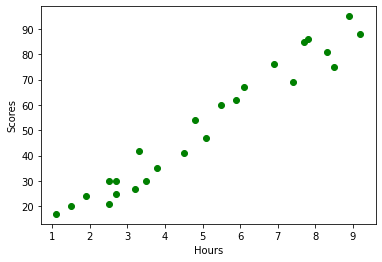

In [61]:
plt.scatter(x=df["Hours"], y=df["Scores"],color="green")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

4)veriyi modele uygun hale getirmek

In [62]:
X =df["Hours"]
Y = df["Scores"]

In [63]:
print(X)

0     2.5
1     5.1
2     3.2
3     8.5
4     3.5
5     1.5
6     9.2
7     5.5
8     8.3
9     2.7
10    7.7
11    5.9
12    4.5
13    3.3
14    1.1
15    8.9
16    2.5
17    1.9
18    6.1
19    7.4
20    2.7
21    4.8
22    3.8
23    6.9
24    7.8
Name: Hours, dtype: float64


In [64]:
print(Y)

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64


In [65]:
import sklearn.model_selection

In [66]:
X_train,X_test,Y_train,Y_test= sklearn.model_selection.train_test_split(X,Y,train_size=0.8) #%80 lik veriyi train olarak alacak kalan kısmı test ve ona karşılık gelen Y labellarını alacak

In [67]:
print(X_train) #modelin daha iyi öğrenmesi için karıştırma yapılması gerekir

4     3.5
21    4.8
20    2.7
6     9.2
5     1.5
2     3.2
9     2.7
11    5.9
22    3.8
23    6.9
17    1.9
24    7.8
10    7.7
19    7.4
16    2.5
15    8.9
13    3.3
3     8.5
8     8.3
1     5.1
Name: Hours, dtype: float64


In [68]:
print(Y_train)

4     30
21    54
20    30
6     88
5     20
2     27
9     25
11    62
22    35
23    76
17    24
24    86
10    85
19    69
16    30
15    95
13    42
3     75
8     81
1     47
Name: Scores, dtype: int64


In [69]:
print(X_test)

0     2.5
12    4.5
7     5.5
18    6.1
14    1.1
Name: Hours, dtype: float64


In [70]:
X_test.shape

(5,)

In [101]:
import numpy as np
X_train=np.array(X_train)
Y_train=np.array(Y_train)
X_test=np.array(X_test)
Y_test=np.array(Y_test)

In [102]:
type(X_train)

numpy.ndarray

In [103]:
X_test.shape

(5,)

In [104]:
X_train=X_train.reshape(-1,1) #-1 otomatik tahmin yapar
Y_train = Y_train.reshape(-1,1)
X_test=X_test.reshape(-1,1)
Y_test= Y_test.reshape(-1,1)

In [105]:
print(X_train.shape)

(20, 1)


In [106]:
print(Y_test.shape)

(5, 1)



5)model seçimi ve modelin eğitilmesi
---



In [107]:
import sklearn.linear_model

In [108]:
lin_model=sklearn.linear_model.LinearRegression()

In [109]:
lin_model.fit(X_train,Y_train)

LinearRegression()

6)modelin optimize edilmesi

In [110]:
import sklearn.metrics

In [111]:
predictions=lin_model.predict(X_test)

In [112]:
X_test[0]

array([2.5])

In [113]:
print(predictions)

[[27.08643563]
 [46.48468338]
 [56.18380725]
 [62.00328158]
 [13.50766221]]


In [114]:
for i in range(len(X_test)):
  print(f"{i}: Gerçek değer: {Y_test[i]}-Tahmin: {predictions[i]}")

0: Gerçek değer: [21]-Tahmin: [27.08643563]
1: Gerçek değer: [41]-Tahmin: [46.48468338]
2: Gerçek değer: [60]-Tahmin: [56.18380725]
3: Gerçek değer: [67]-Tahmin: [62.00328158]
4: Gerçek değer: [17]-Tahmin: [13.50766221]


In [115]:
#MSE - MAE

In [117]:
R2=sklearn.metrics.r2_score(Y_test,predictions)
mae = sklearn.metrics.mean_absolute_error(Y_test, predictions)
mse = sklearn.metrics.mean_squared_error(Y_test,predictions)

In [118]:
print(f"R2:{R2}")
print(f"MAE:{mae}")
print(f"mse:{mse}")


R2:0.9409512143274833
MAE:4.7752735946122895
mse:23.770679160328335


In [120]:
score_predic=lin_model.predict([[5]])

In [121]:
print(score_predic)

[[51.33424532]]


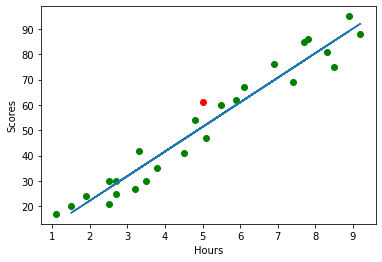

In [126]:
X_predictions=lin_model.predict(X_train)

plt.scatter(x=df["Hours"], y=df["Scores"],color="green")
plt.plot(X_train,X_predictions)

plt.scatter(x=5,y=lin_model.predict([[6]]),color="red")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()